In [1]:
#Se importa pandas para trabajar con el dataset
import pandas as pd

#Se imporata sklearn para aplicaar tecnicas de imputacion
from sklearn.impute import SimpleImputer 

#Se importa numpy para trabar con datos numericos del dataset
import numpy as np

### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler

#Importacion la clase train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split

#Importacion de la clase svm de la libreria sklearn
from sklearn import svm
#Importacion de la clase metrics de la libreria sklearn
from sklearn import metrics

#En caso de aplicar regrecion lineal
from sklearn import linear_model

#Importacion de la clase DecisionTreeClassifier de la libreria sklearn
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('titanic.csv', header=0, sep=',')#Se lee el dataset
df = pd.DataFrame(df)#Se convierte el dataset en un dataframe
df.head()#Se imprime el primer 5 registros del dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()#Se imprime el numero de registros que tiene cada columna que tiene datos faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.isna().sum()#Se imprime el numero de registros que tiene cada columna que tiene datos faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

<AxesSubplot:>

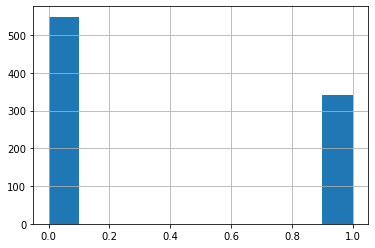

In [20]:
df['Survived'].hist()

In [5]:
df = df.drop(columns=['Ticket','Name','Cabin'])

In [6]:
df.replace({'male':0,'female':1}, inplace=True)
df['Sex'] = df['Sex'].map({1:1,0:0})

In [7]:
im_mena=SimpleImputer(missing_values=np.nan,strategy='mean')
im_mena = im_mena.fit(df[['Age']])
df['Age'] = im_mena.transform(df[['Age']])

In [8]:
one_hot_df = pd.get_dummies(df, prefix=['Embarked'])#Se convierte el dataset en un dataframe con las columnas de categoricas
one_hot_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,0,1
1,2,1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,0,1
889,890,1,1,0,26.000000,0,0,30.0000,1,0,0


In [9]:
X = one_hot_df.drop(columns=['Survived'])#Se obtiene los datos de entrenamiento
Y = one_hot_df['Survived']#Se obtiene los datos de salida

In [10]:
variableEntradaEscalar = StandardScaler()#Se crea un objeto de la clase StandardScaler
variableObejtivaEscalar =  StandardScaler()#Se crea un objeto de la clase StandardScaler

In [11]:
variableEntradaEscalarFit = variableEntradaEscalar.fit(X)
Y = pd.DataFrame(Y)#Por el motivo ques se esperaba una matriz en 2D

#Si no llego a realizar ese paso, me da un error por motivo que es una matriz de 1D
variableObejtivaEscalarFit = variableObejtivaEscalar.fit(Y)

In [12]:
X = variableEntradaEscalarFit.transform(X)
Y = variableObejtivaEscalarFit.transform(Y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_df.drop(columns=['Survived']),one_hot_df['Survived'],test_size=0.3,random_state=1)

In [18]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 10)
(623,)
(268, 10)
(268,)
